We shall work with the Volcano dataset

Let us load and display the volcano data, we shall also need to import the necessary libraries

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load the CSV file from the URL
url = 'https://gist.githubusercontent.com/mattkram/9684863843254402942dfede27af2cb7/raw/2590dd8185b833aacf247c0595edbb07a025a6d7/Smithsonian_VOTW_Holocene_Volcanoes.csv'
volcanoes_df = pd.read_csv(url)

# Display the first 10 rows
print("First 5 rows of the volcano dataset:")
volcanoes_df.head(5)

First 5 rows of the volcano dataset:


,FID,Volcano_Number,Volcano_Name,Primary_Volcano_Type,Last_Eruption_Year,Country,Geological_Summary,Region,Subregion,Latitude,Longitude,Elevation,Tectonic_Setting,Geologic_Epoch,Evidence_Category,Primary_Photo_Link,Primary_Photo_Caption,Primary_Photo_Credit,Major_Rock_Type,GeoLocation
0,Smithsonian_VOTW_Holocene_Volcanoes.fid--d9082...,210010,West Eifel Volcanic Field,Volcanic field,-8300.0,Germany,The West Eifel Volcanic Field of western Germa...,Mediterranean and Western Asia,Western Europe,50.170,6.85,600,Rift zone / Continental crust (> 25 km),Holocene,Eruption Dated,https://volcano.si.edu/gallery/photos/GVP-0150...,The lake-filled Weinfelder maar is one of abou...,"Photo by Richard Waitt, 1990 (U.S. Geological ...",Foidite,POINT (50.17 6.85)
1,Smithsonian_VOTW_Holocene_Volcanoes.fid--d9082...,210020,Chaine des Puys,Lava dome(s),-4040.0,France,"The Chaîne des Puys, prominent in the history ...",Mediterranean and Western Asia,Western Europe,45.775,2.97,1464,Rift zone / Continental crust (> 25 km),Holocene,Eruption Dated,https://volcano.si.edu/gallery/photos/GVP-0880...,The central part of the Chaîne des Puys volcan...,Photo by Ichio Moriya (Kanazawa University).,Basalt / Picro-Basalt,POINT (45.775 2.97)
2,Smithsonian_VOTW_Holocene_Volcanoes.fid--d9082...,210030,Olot Volcanic Field,Volcanic field,NaN,Spain,The Olot volcanic field (also known as the Gar...,Mediterranean and Western Asia,Western Europe,42.170,2.53,893,Intraplate / Continental crust (> 25 km),Holocene,Evidence Credible,https://volcano.si.edu/gallery/photos/GVP-1199...,The forested Volcà Montolivet scoria cone rise...,Photo by Puigalder (Wikimedia Commons).,Trachybasalt / Tephrite Basanite,POINT (42.17 2.53)
3,Smithsonian_VOTW_Holocene_Volcanoes.fid--d9082...,210040,Calatrava Volcanic Field,Volcanic field,-3600.0,Spain,The Calatrava volcanic field lies in central S...,Mediterranean and Western Asia,Western Europe,38.870,-4.02,1117,Intraplate / Continental crust (> 25 km),Holocene,Eruption Dated,https://volcano.si.edu/gallery/photos/GVP-1185...,"Columba volcano, the youngest known vent of th...","Photo by Rafael Becerra Ramírez, 2006 (Univers...",Basalt / Picro-Basalt,POINT (38.87 -4.02)
4,Smithsonian_VOTW_Holocene_Volcanoes.fid--d9082...,211004,Colli Albani,Caldera,NaN,Italy,The Colli Albani (Alban Hills) complex immedia...,Mediterranean and Western Asia,Italy,41.730,12.70,949,Subduction zone / Continental crust (> 25 km),Holocene,Evidence Uncertain,https://volcano.si.edu/gallery/photos/GVP-0881...,The lake-filled Albano maar is part of the Alb...,Photo by Ichio Moriya (Kanazawa University).,Foidite,POINT (41.73 12.7)


Now let us explore the Volcano dataset to help us understand what we are working with

In [41]:
# Get a summary of the dataset
print("Dataset shape (rows, columns):", volcanoes_df.shape)
print("\nColumn names:")
print(volcanoes_df.columns.tolist())
print("\nData types:")
print(volcanoes_df.dtypes)
print("\nSummary statistics for numerical columns:")
print(volcanoes_df.describe())
print("\nCheck for missing values:")
print(volcanoes_df.isnull().sum())

# Explore some specific aspects of the volcano data
print("\nNumber of volcanoes by region:")
print(volcanoes_df['Region'].value_counts())

print("\nNumber of volcanoes by primary volcano type:")
print(volcanoes_df['Primary_Volcano_Type'].value_counts().head(10))  # Top 10 types

print("\nElevation statistics (in meters):")
print(volcanoes_df['Elevation'].describe())

Dataset shape (rows, columns): (1328, 20)

Column names:
['FID', 'Volcano_Number', 'Volcano_Name', 'Primary_Volcano_Type', 'Last_Eruption_Year', 'Country', 'Geological_Summary', 'Region', 'Subregion', 'Latitude', 'Longitude', 'Elevation', 'Tectonic_Setting', 'Geologic_Epoch', 'Evidence_Category', 'Primary_Photo_Link', 'Primary_Photo_Caption', 'Primary_Photo_Credit', 'Major_Rock_Type', 'GeoLocation']

Data types:
FID                       object
Volcano_Number             int64
Volcano_Name              object
Primary_Volcano_Type      object
Last_Eruption_Year       float64
Country                   object
Geological_Summary        object
Region                    object
Subregion                 object
Latitude                 float64
Longitude                float64
Elevation                  int64
Tectonic_Setting          object
Geologic_Epoch            object
Evidence_Category         object
Primary_Photo_Link        object
Primary_Photo_Caption     object
Primary_Photo_Credit   

In [31]:
# Handle missing values in Last_Eruption_Year (469 missing values)
print("\nMissing Last Eruption Year data:")
print(f"Number of volcanoes with missing eruption year: {volcanoes_df['Last_Eruption_Year'].isnull().sum()}")
print(f"Percentage: {volcanoes_df['Last_Eruption_Year'].isnull().mean() * 100:.2f}%")

# Handle missing values in Tectonic_Setting (5 missing values)
print("\nMissing Tectonic Setting data:")
print(f"Number of volcanoes with missing tectonic setting: {volcanoes_df['Tectonic_Setting'].isnull().sum()}")
print(f"Percentage: {volcanoes_df['Tectonic_Setting'].isnull().mean() * 100:.2f}%")

# Handle missing values in Major_Rock_Type (25 missing values)
print("\nMissing Major Rock Type data:")
print(f"Number of volcanoes with missing rock type: {volcanoes_df['Major_Rock_Type'].isnull().sum()}")
print(f"Percentage: {volcanoes_df['Major_Rock_Type'].isnull().mean() * 100:.2f}%")


Missing Last Eruption Year data:
Number of volcanoes with missing eruption year: 469
Percentage: 35.32%

Missing Tectonic Setting data:
Number of volcanoes with missing tectonic setting: 5
Percentage: 0.38%

Missing Major Rock Type data:
Number of volcanoes with missing rock type: 25
Percentage: 1.88%


The last eruption has a significant amount of missing data (35.32%). The tectonic setting has very few missing values (0.38%), and the major rock type has a small percentage of missing values (1.88%)

In [34]:
# Handle missing values in the dataset
print("\n--- Missing Value Handling ---")

# 1. Last_Eruption_Year (significant missing data - 35.32%)
print("\nHandling Last_Eruption_Year missing values:")
# Option 1: Create a category for unknown eruption year
volcanoes_df['Eruption_Known'] = volcanoes_df['Last_Eruption_Year'].notnull().astype(int)
print("Created 'Eruption_Known' flag column")

# Option 2: Fill with a specific value (e.g., -1) to indicate unknown
volcanoes_df['Last_Eruption_Year_Filled'] = volcanoes_df['Last_Eruption_Year'].fillna(-1)
print("Created 'Last_Eruption_Year_Filled' column with -1 for missing values")

# 2. Tectonic_Setting (very few missing - 0.38%)
print("\nHandling Tectonic_Setting missing values:")
# Since there are very few missing values, we can fill with the most common value
most_common_setting = volcanoes_df['Tectonic_Setting'].mode()[0]
volcanoes_df['Tectonic_Setting_Filled'] = volcanoes_df['Tectonic_Setting'].fillna(most_common_setting)
print(f"Filled missing Tectonic_Setting values with most common value: '{most_common_setting}'")

# 3. Major_Rock_Type (small percentage missing - 1.88%)
print("\nHandling Major_Rock_Type missing values:")
# Fill with the most common rock type
most_common_rock = volcanoes_df['Major_Rock_Type'].mode()[0]
volcanoes_df['Major_Rock_Type_Filled'] = volcanoes_df['Major_Rock_Type'].fillna(most_common_rock)
print(f"Filled missing Major_Rock_Type values with most common type: '{most_common_rock}'")

# Verify the changes
print("\nVerifying missing values in new columns:")
print("Last_Eruption_Year_Filled missing:", volcanoes_df['Last_Eruption_Year_Filled'].isnull().sum())
print("Tectonic_Setting_Filled missing:", volcanoes_df['Tectonic_Setting_Filled'].isnull().sum())
print("Major_Rock_Type_Filled missing:", volcanoes_df['Major_Rock_Type_Filled'].isnull().sum())

# Summary statistics for volcanoes with known vs unknown eruption years
print("\nComparison of volcanoes with known vs unknown eruption years:")
print(volcanoes_df.groupby('Eruption_Known')['Elevation'].describe())


--- Missing Value Handling ---

Handling Last_Eruption_Year missing values:
Created 'Eruption_Known' flag column
Created 'Last_Eruption_Year_Filled' column with -1 for missing values

Handling Tectonic_Setting missing values:
Filled missing Tectonic_Setting values with most common value: 'Subduction zone / Continental crust (> 25 km)'

Handling Major_Rock_Type missing values:
Filled missing Major_Rock_Type values with most common type: 'Andesite / Basaltic Andesite'

Verifying missing values in new columns:
Last_Eruption_Year_Filled missing: 0
Tectonic_Setting_Filled missing: 0
Major_Rock_Type_Filled missing: 0

Comparison of volcanoes with known vs unknown eruption years:
                count         mean          std     min    25%     50%  \
Eruption_Known                                                           
0               469.0  1638.607676  1680.213074 -5700.0  655.0  1340.0   
1               859.0  1712.598370  1572.051899 -4200.0  741.5  1552.0   

                   7

Now let us explore our data


--- Exploratory Data Analysis ---

Top 10 regions by number of volcanoes:
Region
South America                  176
Japan, Taiwan, Marianas        134
Indonesia                      122
Africa and Red Sea             119
México and Central America     109
Kamchatka and Mainland Asia     86
Alaska                          83
Melanesia and Australia         73
Canada and Western USA          64
New Zealand to Fiji             55
Name: count, dtype: int64

Creating visualization of regional distribution...


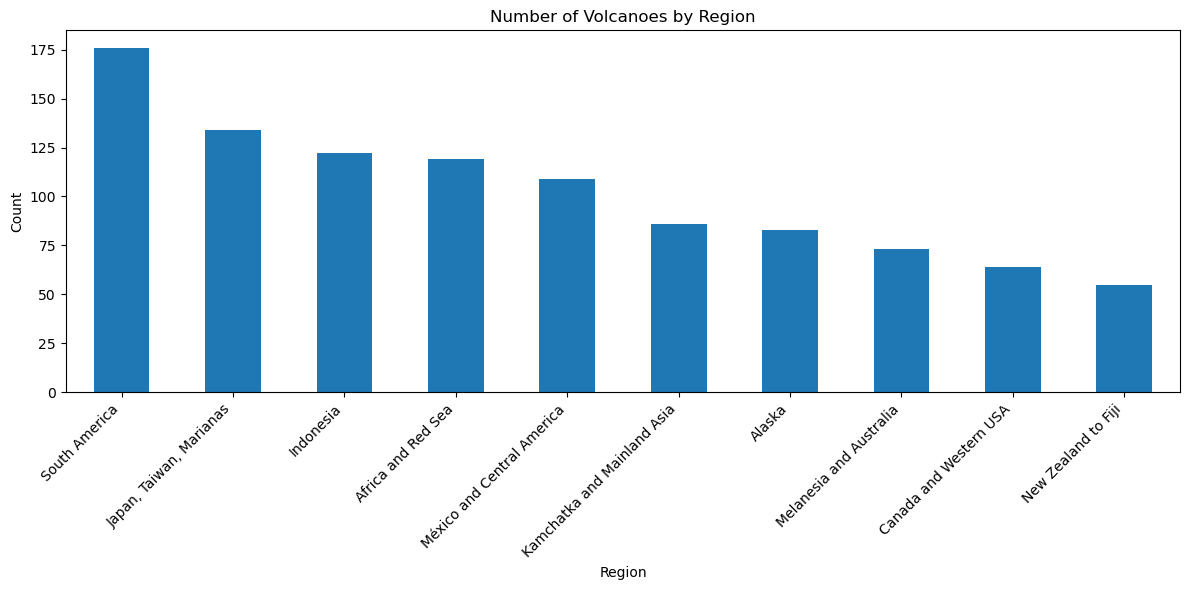


Top volcano types and their counts:
Primary_Volcano_Type
Stratovolcano          541
Volcanic field         151
Submarine              114
Stratovolcano(es)      113
Shield                 100
Caldera                 71
Complex                 52
Pyroclastic cone(s)     36
Lava dome(s)            28
Shield(s)               17
Name: count, dtype: int64

--- Geographical Analysis ---

Creating world map of volcano locations...


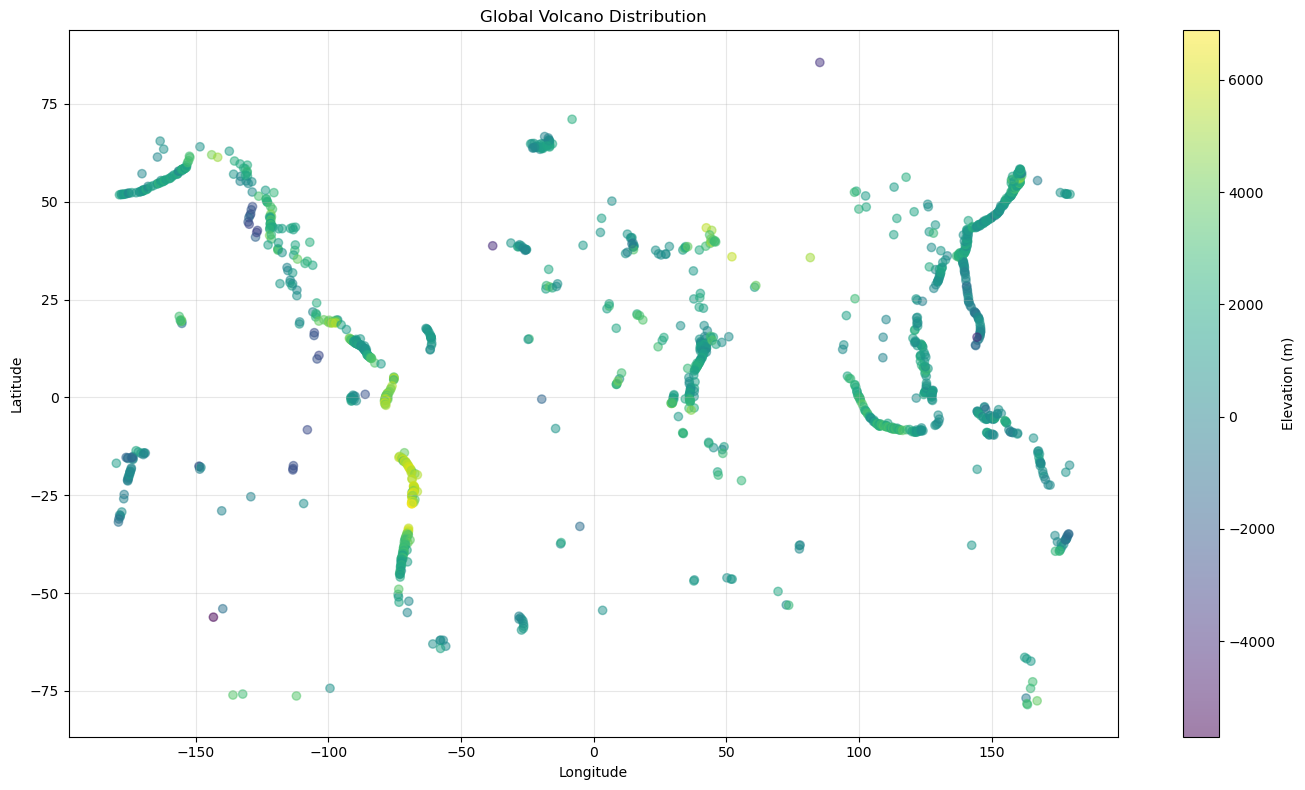


--- Temporal Analysis ---

Eruption year statistics:
count      859.000000
mean       747.331781
std       2382.612232
min     -10450.000000
25%        842.500000
50%       1907.000000
75%       2001.500000
max       2023.000000
Name: Last_Eruption_Year, dtype: float64

Creating histogram of last eruption years...


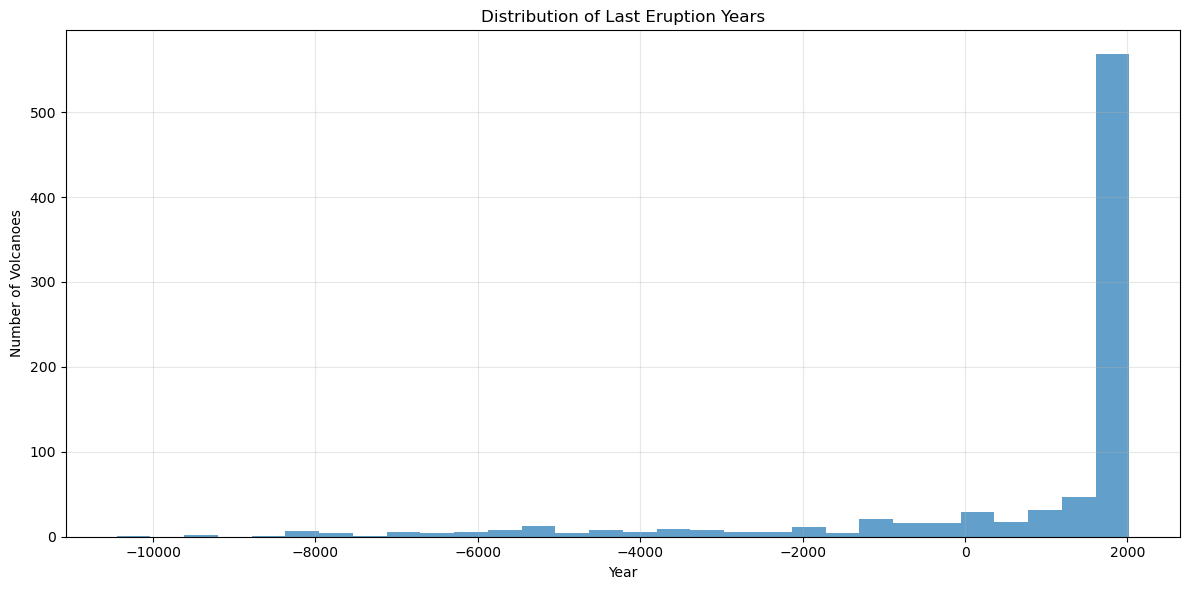


--- Elevation Analysis by Volcano Type ---

Creating boxplot of elevation by volcano type...


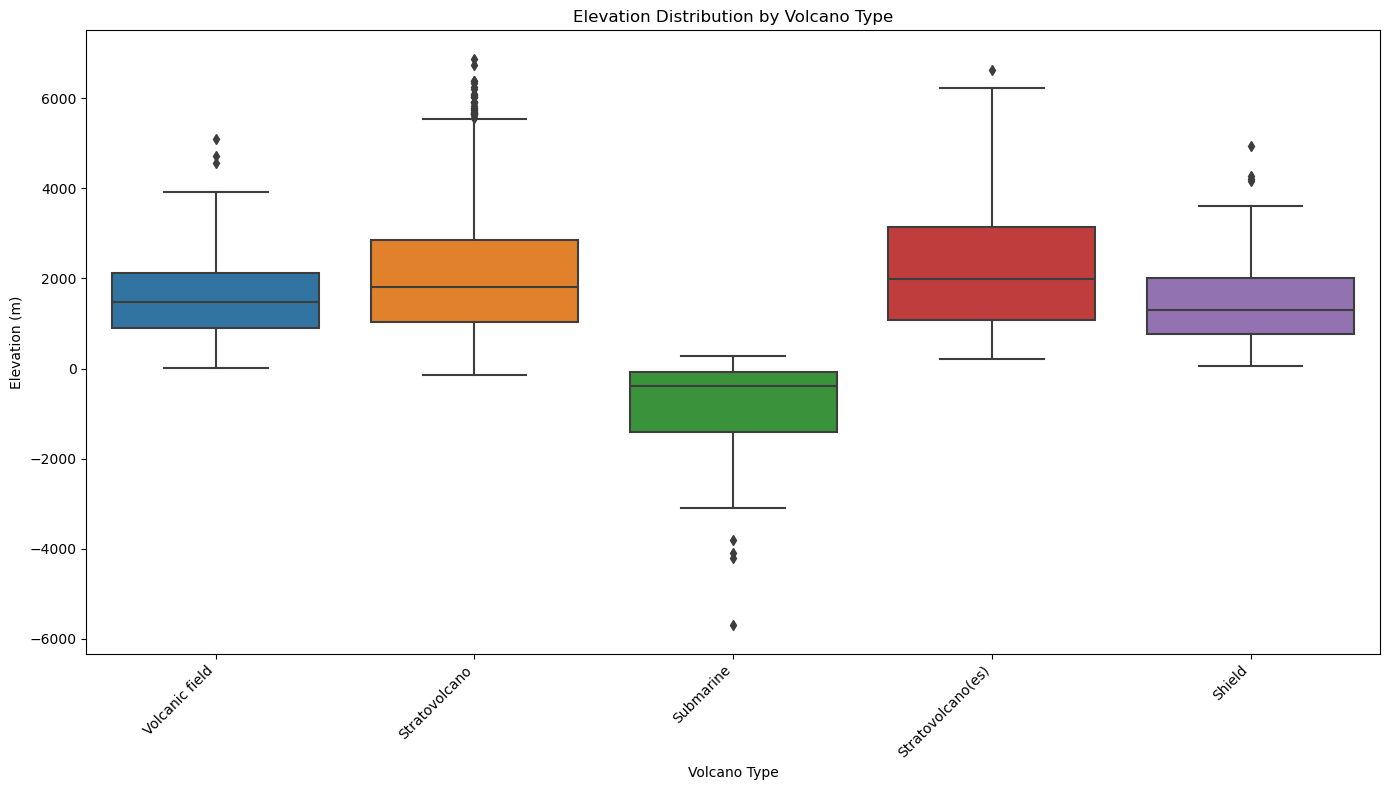


--- Statistical Analysis ---

ANOVA test for elevation differences between volcano types:
F-statistic: 126.2718
p-value: 0.0000
There is a statistically significant difference in elevation between volcano types

--- Correlation Analysis ---

Calculating correlations between numeric variables...
                    Volcano_Number  Last_Eruption_Year  Latitude  Longitude  \
Volcano_Number            1.000000           -0.015500 -0.033819  -0.474684   
Last_Eruption_Year       -0.015500            1.000000 -0.098267   0.062374   
Latitude                 -0.033819           -0.098267  1.000000   0.039018   
Longitude                -0.474684            0.062374  0.039018   1.000000   
Elevation                 0.222542           -0.063558 -0.134408  -0.163035   

                    Elevation  
Volcano_Number       0.222542  
Last_Eruption_Year  -0.063558  
Latitude            -0.134408  
Longitude           -0.163035  
Elevation            1.000000  

Creating correlation heatmap...


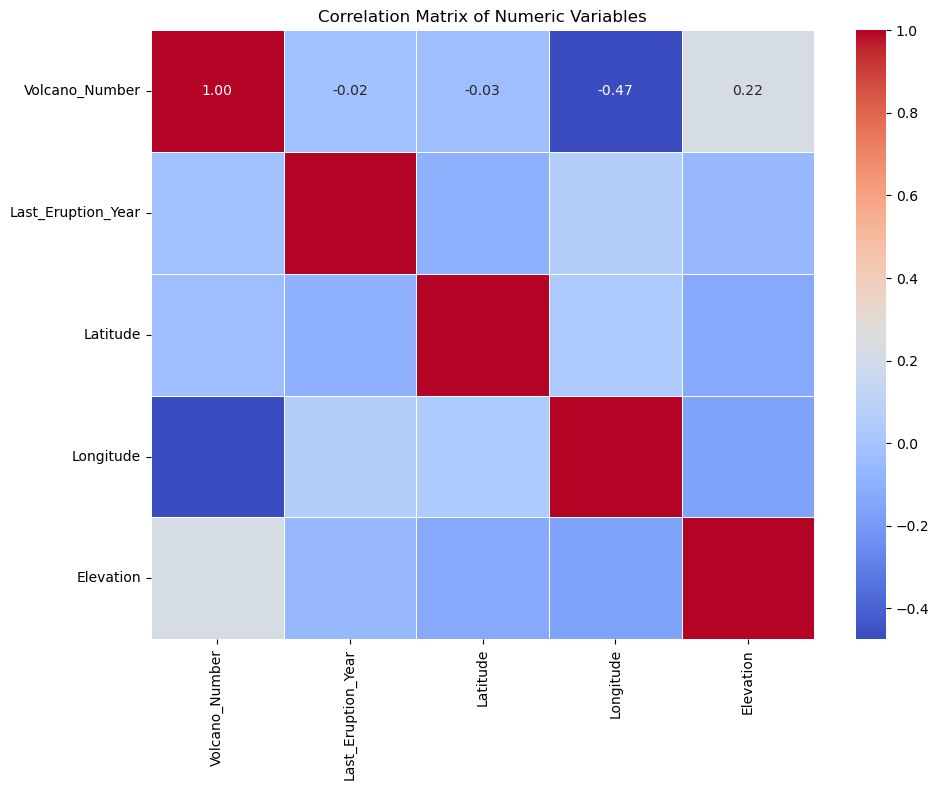

In [44]:
# Next steps in volcano dataset analysis

# 1. Exploratory Data Analysis (EDA)
print("\n--- Exploratory Data Analysis ---")

# Distribution of volcanoes by region
print("\nTop 10 regions by number of volcanoes:")
region_counts = volcanoes_df['Region'].value_counts().head(10)
print(region_counts)

# Visualize regional distribution
print("\nCreating visualization of regional distribution...")
plt.figure(figsize=(12, 6))
region_counts.plot(kind='bar')
plt.title('Number of Volcanoes by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 2. Analyze volcano types
print("\nTop volcano types and their counts:")
type_counts = volcanoes_df['Primary_Volcano_Type'].value_counts().head(10)
print(type_counts)

# 3. Geographical analysis
print("\n--- Geographical Analysis ---")
print("\nCreating world map of volcano locations...")
plt.figure(figsize=(14, 8))
plt.scatter(volcanoes_df['Longitude'], volcanoes_df['Latitude'], 
           alpha=0.5, c=volcanoes_df['Elevation'], cmap='viridis')
plt.colorbar(label='Elevation (m)')
plt.title('Global Volcano Distribution')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 4. Temporal analysis of eruptions
print("\n--- Temporal Analysis ---")
# Filter to only include volcanoes with known eruption years
eruption_df = volcanoes_df[volcanoes_df['Last_Eruption_Year'].notnull()].copy()
# Convert to numeric if not already
eruption_df['Last_Eruption_Year'] = pd.to_numeric(eruption_df['Last_Eruption_Year'])

print("\nEruption year statistics:")
print(eruption_df['Last_Eruption_Year'].describe())

# Create histogram of eruption years
print("\nCreating histogram of last eruption years...")
plt.figure(figsize=(12, 6))
plt.hist(eruption_df['Last_Eruption_Year'], bins=30, alpha=0.7)
plt.title('Distribution of Last Eruption Years')
plt.xlabel('Year')
plt.ylabel('Number of Volcanoes')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 5. Relationship between elevation and volcano type
print("\n--- Elevation Analysis by Volcano Type ---")
# Get the top 5 most common volcano types
top_types = volcanoes_df['Primary_Volcano_Type'].value_counts().head(5).index

# Filter the dataframe to include only these types
top_type_df = volcanoes_df[volcanoes_df['Primary_Volcano_Type'].isin(top_types)]

print("\nCreating boxplot of elevation by volcano type...")
plt.figure(figsize=(14, 8))
sns.boxplot(x='Primary_Volcano_Type', y='Elevation', data=top_type_df)
plt.title('Elevation Distribution by Volcano Type')
plt.xlabel('Volcano Type')
plt.ylabel('Elevation (m)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 6. Statistical tests
print("\n--- Statistical Analysis ---")
# ANOVA test to see if elevation differs significantly between volcano types
from scipy import stats

# Prepare data for ANOVA
volcano_types = []
elevations = []

for vtype in top_types:
    elev = volcanoes_df[volcanoes_df['Primary_Volcano_Type'] == vtype]['Elevation'].dropna()
    volcano_types.extend([vtype] * len(elev))
    elevations.extend(elev)

# Run ANOVA
f_stat, p_value = stats.f_oneway(
    *[volcanoes_df[volcanoes_df['Primary_Volcano_Type'] == vtype]['Elevation'].dropna() 
      for vtype in top_types]
)

print(f"\nANOVA test for elevation differences between volcano types:")
print(f"F-statistic: {f_stat:.4f}")
print(f"p-value: {p_value:.4f}")
if p_value < 0.05:
    print("There is a statistically significant difference in elevation between volcano types")
else:
    print("There is no statistically significant difference in elevation between volcano types")

# 7. Correlation analysis
print("\n--- Correlation Analysis ---")
# Select numeric columns
numeric_df = volcanoes_df.select_dtypes(include=['number'])
print("\nCalculating correlations between numeric variables...")
correlation = numeric_df.corr()
print(correlation)

# Visualize correlation matrix
print("\nCreating correlation heatmap...")
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numeric Variables')
plt.tight_layout()
plt.show()